# **UAS PPW**
1. CRAWLING BERITA 1000 BERITA 3 KATEGORI
2. REPRESENTASI FITUR (LDA)
3. MODEL KLASIFIKASI
4. EVALUASI
5. IMPLEMENTASI

Coba implementasi dari Tugas Uas ini

https://implementasi-uas-ppw.streamlit.app/


## **Crawling**

Crawling web adalah proses pengumpulan data dari berbagai halaman web oleh program komputer yang disebut "web crawler" atau "spider." Web crawler secara otomatis menjelajahi internet, mengikuti tautan antarhalaman, dan mengumpulkan informasi untuk diindeks atau disimpan.

Pada tugas kali ini saya akan melakukan crawling berita di website portal berita online indo times dengan mengambil 3 kategori yakni olahraga, teknologi dan edukasi. total data yang di crawling adalah 1100 dengan masing-masing kategori 350 berita

### **Import Library**

1. **`requests` (`req`):** Library untuk membuat permintaan HTTP ke server dan mengambil responsenya, memungkinkan akses dan pengunduhan konten dari situs web.

2. **`BeautifulSoup` (`bs`):** Memudahkan ekstraksi data dari HTML atau XML, membuat pohon objek dari dokumen dan menyediakan cara efisien untuk mencari dan ekstraksi informasi.

3. **`csv`:** Library standar untuk membaca dan menulis file CSV, memudahkan penyimpanan data dalam format yang dapat diakses dan diolah.

4. **`re`:** Modul ekspresi reguler untuk manipulasi string berdasarkan pola tertentu, digunakan untuk pencarian, penggantian, dan manipulasi teks.

Dengan gabungan keempat library tersebut, Anda dapat melakukan web scraping, menyimpan data dalam format CSV, dan melakukan manipulasi string secara efisien.

In [ ]:
import requests as req
from bs4 import BeautifulSoup as bs
import csv
import re

### Proses Crawling Olahraga

Tujuan dari kode ini adalah untuk mengumpulkan berita olahraga dari situs web 'https://indotimes.net/category/sport/'.

Secara rinci, langkah-langkahnya sebagai berikut:

1. **Loop Halaman:** Kode dimulai dengan loop dari halaman 1 hingga 35 (`for page in range(1, 36)`) untuk mengakses berbagai halaman berita olahraga.

2. **Ambil Data:** Setiap halaman diakses menggunakan URL yang dibuat berdasarkan nomor halaman dalam loop. Data HTML dari halaman tersebut diambil menggunakan Requests (`ge = req.get(url).text`) dan di-parse menggunakan BeautifulSoup (`sop = bs(ge,'lxml')`).

3. **Ekstrak Berita:** Berita diambil dari elemen HTML yang sesuai dengan struktur halaman web. Setiap artikel di dalam halaman diidentifikasi dan diambil judul serta linknya.

4. **Loop Artikel:** Selanjutnya, untuk setiap artikel, kode mengambil judul, link, dan kemudian mengakses link artikel tersebut (`ge_ = req.get(link).text`). Untuk menghindari masalah redirect, dilakukan penanganan exception `req.exceptions.TooManyRedirects`.

5. **Ekstrak Konten Berita:** Konten berita diambil dari halaman artikel menggunakan BeautifulSoup, dan setiap paragraf berita disatukan menjadi satu string.

6. **Penyimpanan Data:** Data berita, termasuk judul, konten, dan label (dalam hal ini, 'Olahraga'), dimasukkan ke dalam list `datas`.

7. **Pencetakan Informasi:** Informasi berita seperti judul, link, dan label dicetak ke layar untuk pemantauan.

8. **Format Data:** Data diorganisir dalam bentuk dictionary dan disimpan dalam list `datas`.

In [ ]:
datas = []
berita_ke = 0
for page in range(1,36):
    url = f'https://indotimes.net/category/sport/page/{page}/'
    ge = req.get(url).text
    sop = bs(ge,'lxml')
    list_berita = sop.find('div',class_='jeg_inner_content')
    artikel = list_berita.find_all('article')
    print(f"============ anda berada di halaman {page}===================")
    for x in artikel:
        title = x.find('h3').text
        title = title.strip()
        link = x.find('h3').find('a')['href']
        try:
            ge_ = req.get(link).text
        except req.exceptions.TooManyRedirects as e:
            final_url = e.response.url
    # Now you can use 'final_url' for further processing
        sop_ = bs(ge_,'lxml')
        news = sop_.find_all('div', class_='entry-content no-share')
        berita_ke += 1
        print(f"================ Berita ke {berita_ke}=======================")
        print("Judul =", title)
        print("Link = ",link)
        print("Label = Olahraga")
        for x in news:
            news_full = ""
            paragraphs = x.find_all('p')
            for paragraph in paragraphs:
                news_full += paragraph.get_text()
            news_full = re.sub(r'[^\x00-\x7F]+', '', news_full)
            datas.append({
              'Judul': title,
              'Berita': news_full,
              'Label': 'Olahraga'
            })

============ anda berada di halaman 1===================
================ Berita ke 1=======================
Judul = Mason Greenwood Gemparkan Penonton dengan Tendangan Spektakuler di Laga Getafe vs Almeria
Link =  https://indotimes.net/sport/mason-greenwood-2/
Label = Olahraga
================ Berita ke 2=======================
Judul = Hasil Akhir Atalanta vs Napoli dengan Skor 1 – 2: Eljif Elmas Jadi Pahlawan
Link =  https://indotimes.net/sport/atalanta-vs-napoli/
Label = Olahraga
================ Berita ke 3=======================
Judul = Marathon 42k di Jakarta: Kisah Osha, Penyandang Autisme Berhasil Lomba Lari
Link =  https://indotimes.net/sport/marathon-42k-di-jakarta/
Label = Olahraga
================ Berita ke 4=======================
Judul = Drama Tegang Al Ettifaq Vs Al Ittihad Berakhir Imbang 1-1
Link =  https://indotimes.net/sport/al-ettifaq-vs-al-ittihad-berakhir-imbang-1-1/
Label = Olahraga
================ Berita ke 5=======================
Judul = Hasil FP1 MotoGP Vale

In [ ]:
len(datas)

350

### **Proses Crawling Teknologi**

Tujuan dari kode ini adalah untuk mengumpulkan berita olahraga dari situs web 'https://indotimes.net/category/teknologi/'.

Secara rinci, langkah-langkahnya sebagai berikut:

1. **Loop Halaman:** Kode dimulai dengan loop dari halaman 1 hingga 35 (`for page in range(1, 36)`) untuk mengakses berbagai halaman berita olahraga.

2. **Ambil Data:** Setiap halaman diakses menggunakan URL yang dibuat berdasarkan nomor halaman dalam loop. Data HTML dari halaman tersebut diambil menggunakan Requests (`ge = req.get(url).text`) dan di-parse menggunakan BeautifulSoup (`sop = bs(ge,'lxml')`).

3. **Ekstrak Berita:** Berita diambil dari elemen HTML yang sesuai dengan struktur halaman web. Setiap artikel di dalam halaman diidentifikasi dan diambil judul serta linknya.

4. **Loop Artikel:** Selanjutnya, untuk setiap artikel, kode mengambil judul, link, dan kemudian mengakses link artikel tersebut (`ge_ = req.get(link).text`). Untuk menghindari masalah redirect, dilakukan penanganan exception `req.exceptions.TooManyRedirects`.

5. **Ekstrak Konten Berita:** Konten berita diambil dari halaman artikel menggunakan BeautifulSoup, dan setiap paragraf berita disatukan menjadi satu string.

6. **Penyimpanan Data:** Data berita, termasuk judul, konten, dan label (dalam hal ini, 'Olahraga'), dimasukkan ke dalam list `datas`.

7. **Pencetakan Informasi:** Informasi berita seperti judul, link, dan label dicetak ke layar untuk pemantauan.

8. **Format Data:** Data diorganisir dalam bentuk dictionary dan disimpan dalam list `datas`.


In [ ]:
berita_ke = 0
for page in range(1,36):
    url = f'https://indotimes.net/category/teknologi/page/{page}/'
    ge = req.get(url).text
    sop = bs(ge,'lxml')
    list_berita = sop.find('div',class_='jeg_inner_content')
    artikel = list_berita.find_all('article')
    print(f"============ anda berada di halaman {page}===================")
    for x in artikel:
        title = x.find('h3').text
        title = title.strip()
        link = x.find('h3').find('a')['href']
        try:
            ge_ = req.get(link).text
        except req.exceptions.TooManyRedirects as e:
            final_url = e.response.url
    # Now you can use 'final_url' for further processing
        sop_ = bs(ge_,'lxml')
        news = sop_.find_all('div', class_='entry-content no-share')
        berita_ke += 1
        print(f"================ Berita ke {berita_ke}=======================")
        print("Judul =", title)
        print("Link = ",link)
        print("Label = Teknologi")
        for x in news:
            news_full = ""
            paragraphs = x.find_all('p')
            for paragraph in paragraphs:
                news_full += paragraph.get_text()
            news_full = re.sub(r'[^\x00-\x7F]+', '', news_full)
            datas.append({
              'Judul': title,
              'Berita': news_full,
              'Label': 'Teknologi'
            })

============ anda berada di halaman 1===================
================ Berita ke 1=======================
Judul = 5 Cara Melihat Status WA yang Disembunyikan, Mudah dan Sedehana!
Link =  https://indotimes.net/teknologi/melihat-status-wa-yang-disembunyikan/
Label = Teknologi
================ Berita ke 2=======================
Judul = Perpanjangan SKCK Online: Syarat Terbaru 2023 di Polres
Link =  https://indotimes.net/teknologi/perpanjangan-skck-online/
Label = Teknologi
================ Berita ke 3=======================
Judul = Web Hosting Murah Indonesia Unlimited dan Terbaik di 2023
Link =  https://indotimes.net/teknologi/web-hosting-murah-indonesia/
Label = Teknologi
================ Berita ke 4=======================
Judul = 8 Cara Download Genshin Impact di PC, Gampang!
Link =  https://indotimes.net/teknologi/download-genshin-impact-di-pc-2/
Label = Teknologi
================ Berita ke 5=======================
Judul = 8 Aplikasi Sketsa Wajah Terbaik 2023 untuk iOS dan Android


### **Proses Crawling Edukasi**

Tujuan dari kode ini adalah untuk mengumpulkan berita olahraga dari situs web 'https://indotimes.net/category/edukasi/'.

Secara rinci, langkah-langkahnya sebagai berikut:

1. **Loop Halaman:** Kode dimulai dengan loop dari halaman 1 hingga 35 (`for page in range(1, 36)`) untuk mengakses berbagai halaman berita olahraga.

2. **Ambil Data:** Setiap halaman diakses menggunakan URL yang dibuat berdasarkan nomor halaman dalam loop. Data HTML dari halaman tersebut diambil menggunakan Requests (`ge = req.get(url).text`) dan di-parse menggunakan BeautifulSoup (`sop = bs(ge,'lxml')`).

3. **Ekstrak Berita:** Berita diambil dari elemen HTML yang sesuai dengan struktur halaman web. Setiap artikel di dalam halaman diidentifikasi dan diambil judul serta linknya.

4. **Loop Artikel:** Selanjutnya, untuk setiap artikel, kode mengambil judul, link, dan kemudian mengakses link artikel tersebut (`ge_ = req.get(link).text`). Untuk menghindari masalah redirect, dilakukan penanganan exception `req.exceptions.TooManyRedirects`.

5. **Ekstrak Konten Berita:** Konten berita diambil dari halaman artikel menggunakan BeautifulSoup, dan setiap paragraf berita disatukan menjadi satu string.

6. **Penyimpanan Data:** Data berita, termasuk judul, konten, dan label (dalam hal ini, 'Olahraga'), dimasukkan ke dalam list `datas`.

7. **Pencetakan Informasi:** Informasi berita seperti judul, link, dan label dicetak ke layar untuk pemantauan.

8. **Format Data:** Data diorganisir dalam bentuk dictionary dan disimpan dalam list `datas`.


In [ ]:
berita_ke = 0
for page in range(1,36):
    url = f'https://indotimes.net/category/edukasi/page/{page}/'
    ge = req.get(url).text
    sop = bs(ge,'lxml')
    list_berita = sop.find('div',class_='jeg_inner_content')
    artikel = list_berita.find_all('article')
    print(f"============ anda berada di halaman {page}===================")
    for x in artikel:
        title = x.find('h3').text
        title = title.strip()
        link = x.find('h3').find('a')['href']
        try:
            ge_ = req.get(link).text
        except req.exceptions.TooManyRedirects as e:
            final_url = e.response.url
    # Now you can use 'final_url' for further processing
        sop_ = bs(ge_,'lxml')
        news = sop_.find_all('div', class_='entry-content no-share')
        berita_ke += 1
        print(f"================ Berita ke {berita_ke}=======================")
        print("Judul =", title)
        print("Link = ",link)
        print("Label = Edukasi")
        for x in news:
            news_full = ""
            paragraphs = x.find_all('p')
            for paragraph in paragraphs:
                news_full += paragraph.get_text()
            news_full = re.sub(r'[^\x00-\x7F]+', '', news_full)
            datas.append({
              'Judul': title,
              'Berita': news_full,
              'Label': 'Edukasi'
            })

============ anda berada di halaman 1===================
================ Berita ke 1=======================
Judul = Serba-Serbi Hari Noken 4 Desember yang Dirayakan Seluruh Dunia
Link =  https://indotimes.net/berita/hari-noken-4-desember/
Label = Edukasi
================ Berita ke 2=======================
Judul = Mengenal Habitat Udang Capit Biru, Fakta-fakta dan 6 Tips Budidaya
Link =  https://indotimes.net/edukasi/udang-capit-biru/
Label = Edukasi
================ Berita ke 3=======================
Judul = Contoh Kata-Kata Bijak Lucu, Namun Bermakna
Link =  https://indotimes.net/edukasi/kata-kata-bijak-lucu/
Label = Edukasi
================ Berita ke 4=======================
Judul = 7 Tips Dekorasi Kamar Pengantin Agar Semakin Menarik
Link =  https://indotimes.net/edukasi/dekorasi-kamar-pengantin/
Label = Edukasi
================ Berita ke 5=======================
Judul = Surat Penawaran Barang Elektronik, 6 Komponen yang Harus Ada
Link =  https://indotimes.net/edukasi/surat-penawar

### **Save Berita**

setelah semua data sudah di crawling selanjutnya adalah menyimpan data dalam bentuk CSV

In [ ]:
# Menyimpan data dalam bentuk CSV
csv_filename = 'data_berita.csv'
with open(csv_filename, 'w', newline='', encoding='utf-8') as csv_file:
    fieldnames = ['Judul','Berita', 'Label']
    csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    csv_writer.writeheader()

    for entry in datas:
        csv_writer.writerow(entry)

print(f"Data telah disimpan dalam file {csv_filename}")

Data telah disimpan dalam file data_berita.csv


In [ ]:
len(datas)

1101

## **Normalisasi Data**

Normalisasi data adalah proses mengubah data menjadi bentuk standar atau normal sehingga lebih mudah untuk dibandingkan atau diproses. Dalam konteks pemrosesan teks atau NLP (Natural Language Processing), normalisasi seringkali melibatkan langkah-langkah seperti pembersihan data, penghapusan karakter yang tidak diinginkan, dan pengolahan teks agar dapat diolah dengan lebih efektif.

### **Import Library**

1. **`NLTK (Natural Language Toolkit):`** Library NLP untuk tokenisasi, koleksi dataset bahasa, dan stemming.

2. **`Pandas (import pandas as pd):`** Library analisis data tabular dengan dataframe.

3. **`NumPy (import numpy as np):`** Library operasi matematika dan manipulasi array.

4. **`Re (Regular Expression):`** Modul ekspresi reguler untuk manipulasi string berdasarkan pola tertentu.

5. **`Warnings (import warnings):`** Modul pengatur peringatan dan penanganan kondisi tidak diinginkan.

6. **`PorterStemmer (from nltk.stem import PorterStemmer):`** Algoritma stemming Porter untuk mengubah kata-kata ke bentuk dasarnya.

In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import pandas as pd
import numpy as np
import re
import warnings
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### **Upload Dataset**

In [2]:
import os

%cd /content/
os.mkdir('data_berita')

import gdown
# download data

nama_data = '/content/data_berita/data_berita.csv'
gdown.download(f'https://drive.google.com/uc?id=1JcrnkAhFwwG1XFQjbI0b3W1I8uPWZZGH', nama_data, quiet=False)

/content


Downloading...
From: https://drive.google.com/uc?id=1JcrnkAhFwwG1XFQjbI0b3W1I8uPWZZGH
To: /content/data_berita/data_berita.csv
100%|██████████| 5.66M/5.66M [00:00<00:00, 27.9MB/s]


'/content/data_berita/data_berita.csv'

In [3]:
import pandas as pd

data_berita = pd.read_csv('/content/data_berita/data_berita.csv')
data_berita

,Judul,Berita,Label
0,Mason Greenwood Gemparkan Penonton dengan Tend...,Mason Greenwood mencatat namanya dalam sejarah...,Olahraga
1,Hasil Akhir Atalanta vs Napoli dengan Skor 1 –...,Dalam pertandingan seru Atalanta vs Napoli pek...,Olahraga
2,"Marathon 42k di Jakarta: Kisah Osha, Penyandan...",Natrio Catra Yososha viral di media sosial set...,Olahraga
3,Drama Tegang Al Ettifaq Vs Al Ittihad Berakhir...,Pertandingan Al Ettifaq vs Al Ittihad diakhiri...,Olahraga
4,Hasil FP1 MotoGP Valencia 2023: Zarco Melesat ...,Hasil FP1 MotoGP Valencia 2023 kali ini dimena...,Olahraga
...,...,...,...
1096,5 Masalah Keuangan Generasi Milenial yang Biki...,Banyak yang beranggapan bahwa generasi milenia...,Edukasi
1097,"Makna Ketupat Di Hari Lebaran, Sejarah dan Fil...","Siapa yang tidak suka ketupat, apalagi disajik...",Edukasi
1098,"Gerhana Matahari Hibrida 2023, Fenomena Alam y...","Setelah tujuh tahun, Indonesia akan menyaksika...",Edukasi
1099,9 Tips Persiapan Mudik Lebaran Agar Aman dan N...,Mudik dengan kendaraan pribadi memang menantan...,Edukasi


### **Cleaning**

Pengecekan data yang kosong

In [ ]:
# cek apakah ada data yang kosong
data_berita.isnull().sum()

Judul     0
Berita    0
Label     0
dtype: int64

### **Punctuation**
Menghapus string yang tidak perlu, membuat semua huruf jadi huruf kecil dan menghilangkan angka-angka tidak penting

In [ ]:
data_berita['Punctuation'] = data_berita['Berita'].str.replace(r'[^\w\s,.?!]', '', regex=True).str.lower()
data_berita['Punctuation'] = data_berita['Punctuation'].str.replace('\d+', '', regex=True)

### **Stopword**

Stopword adalah kata-kata umum yang sering tidak memberikan nilai tambah pada analisis teks karena keberadaannya yang umum dan sering muncul.

In [ ]:
# Inisialisasi kamus stop words dari NLTK
stop_words = set(stopwords.words('indonesian'))  # Inisialisasi kamus stop words di luar loop
# Fungsi untuk menghapus stop words
def remove_stopwords(text):
    if isinstance(text, str):  # Periksa apakah teks adalah string
        return ' '.join(word for word in text.split() if word not in stop_words)
    else:
        return ''  # Mengembalikan string kosong untuk nilai non-string

data_berita['Stopword'] = data_berita['Punctuation'].apply(remove_stopwords)
data_berita

,Judul,Berita,Label,Punctuation,Stopword
0,Mason Greenwood Gemparkan Penonton dengan Tend...,Mason Greenwood mencatat namanya dalam sejarah...,Olahraga,mason greenwood mencatat namanya dalam sejarah...,mason greenwood mencatat namanya sejarah getaf...
1,Hasil Akhir Atalanta vs Napoli dengan Skor 1 –...,Dalam pertandingan seru Atalanta vs Napoli pek...,Olahraga,dalam pertandingan seru atalanta vs napoli pek...,pertandingan seru atalanta vs napoli pekan lig...
2,"Marathon 42k di Jakarta: Kisah Osha, Penyandan...",Natrio Catra Yososha viral di media sosial set...,Olahraga,natrio catra yososha viral di media sosial set...,natrio catra yososha viral media sosial berhas...
3,Drama Tegang Al Ettifaq Vs Al Ittihad Berakhir...,Pertandingan Al Ettifaq vs Al Ittihad diakhiri...,Olahraga,pertandingan al ettifaq vs al ittihad diakhiri...,pertandingan al ettifaq vs al ittihad skor imb...
4,Hasil FP1 MotoGP Valencia 2023: Zarco Melesat ...,Hasil FP1 MotoGP Valencia 2023 kali ini dimena...,Olahraga,hasil fp motogp valencia kali ini dimenangi o...,hasil fp motogp valencia kali dimenangi johann...
...,...,...,...,...,...
1096,5 Masalah Keuangan Generasi Milenial yang Biki...,Banyak yang beranggapan bahwa generasi milenia...,Edukasi,banyak yang beranggapan bahwa generasi milenia...,beranggapan generasi milenial memiliki literas...
1097,"Makna Ketupat Di Hari Lebaran, Sejarah dan Fil...","Siapa yang tidak suka ketupat, apalagi disajik...",Edukasi,"siapa yang tidak suka ketupat, apalagi disajik...","suka ketupat, disajikan lengkap opor sambal? l..."
1098,"Gerhana Matahari Hibrida 2023, Fenomena Alam y...","Setelah tujuh tahun, Indonesia akan menyaksika...",Edukasi,"setelah tujuh tahun, indonesia akan menyaksika...","tujuh tahun, indonesia menyaksikan gerhana mat..."
1099,9 Tips Persiapan Mudik Lebaran Agar Aman dan N...,Mudik dengan kendaraan pribadi memang menantan...,Edukasi,mudik dengan kendaraan pribadi memang menantan...,mudik kendaraan pribadi menantang. ikuti persi...


### **Tokenizing**

Tokenizing adalah proses memecah teks menjadi unit-unit yang lebih kecil, seperti kata atau frasa.

In [ ]:
data_berita["tokenizing"] = data_berita['Stopword'].apply(word_tokenize)

In [ ]:
data_berita

,Judul,Berita,Label,Punctuation,Stopword,tokenizing
0,Mason Greenwood Gemparkan Penonton dengan Tend...,Mason Greenwood mencatat namanya dalam sejarah...,Olahraga,mason greenwood mencatat namanya dalam sejarah...,mason greenwood mencatat namanya sejarah getaf...,"[mason, greenwood, mencatat, namanya, sejarah,..."
1,Hasil Akhir Atalanta vs Napoli dengan Skor 1 –...,Dalam pertandingan seru Atalanta vs Napoli pek...,Olahraga,dalam pertandingan seru atalanta vs napoli pek...,pertandingan seru atalanta vs napoli pekan lig...,"[pertandingan, seru, atalanta, vs, napoli, pek..."
2,"Marathon 42k di Jakarta: Kisah Osha, Penyandan...",Natrio Catra Yososha viral di media sosial set...,Olahraga,natrio catra yososha viral di media sosial set...,natrio catra yososha viral media sosial berhas...,"[natrio, catra, yososha, viral, media, sosial,..."
3,Drama Tegang Al Ettifaq Vs Al Ittihad Berakhir...,Pertandingan Al Ettifaq vs Al Ittihad diakhiri...,Olahraga,pertandingan al ettifaq vs al ittihad diakhiri...,pertandingan al ettifaq vs al ittihad skor imb...,"[pertandingan, al, ettifaq, vs, al, ittihad, s..."
4,Hasil FP1 MotoGP Valencia 2023: Zarco Melesat ...,Hasil FP1 MotoGP Valencia 2023 kali ini dimena...,Olahraga,hasil fp motogp valencia kali ini dimenangi o...,hasil fp motogp valencia kali dimenangi johann...,"[hasil, fp, motogp, valencia, kali, dimenangi,..."
...,...,...,...,...,...,...
1096,5 Masalah Keuangan Generasi Milenial yang Biki...,Banyak yang beranggapan bahwa generasi milenia...,Edukasi,banyak yang beranggapan bahwa generasi milenia...,beranggapan generasi milenial memiliki literas...,"[beranggapan, generasi, milenial, memiliki, li..."
1097,"Makna Ketupat Di Hari Lebaran, Sejarah dan Fil...","Siapa yang tidak suka ketupat, apalagi disajik...",Edukasi,"siapa yang tidak suka ketupat, apalagi disajik...","suka ketupat, disajikan lengkap opor sambal? l...","[suka, ketupat, ,, disajikan, lengkap, opor, s..."
1098,"Gerhana Matahari Hibrida 2023, Fenomena Alam y...","Setelah tujuh tahun, Indonesia akan menyaksika...",Edukasi,"setelah tujuh tahun, indonesia akan menyaksika...","tujuh tahun, indonesia menyaksikan gerhana mat...","[tujuh, tahun, ,, indonesia, menyaksikan, gerh..."
1099,9 Tips Persiapan Mudik Lebaran Agar Aman dan N...,Mudik dengan kendaraan pribadi memang menantan...,Edukasi,mudik dengan kendaraan pribadi memang menantan...,mudik kendaraan pribadi menantang. ikuti persi...,"[mudik, kendaraan, pribadi, menantang, ., ikut..."


### **Menggabung Kata**

In [ ]:
# menggabungkan kata
data_berita['artikel_final'] = data_berita["tokenizing"] .apply(lambda tokens: ' '.join(tokens))

In [ ]:
data_berita

,Judul,Berita,Label,Punctuation,Stopword,tokenizing,artikel_final
0,Mason Greenwood Gemparkan Penonton dengan Tend...,Mason Greenwood mencatat namanya dalam sejarah...,Olahraga,mason greenwood mencatat namanya dalam sejarah...,mason greenwood mencatat namanya sejarah getaf...,"[mason, greenwood, mencatat, namanya, sejarah,...",mason greenwood mencatat namanya sejarah getaf...
1,Hasil Akhir Atalanta vs Napoli dengan Skor 1 –...,Dalam pertandingan seru Atalanta vs Napoli pek...,Olahraga,dalam pertandingan seru atalanta vs napoli pek...,pertandingan seru atalanta vs napoli pekan lig...,"[pertandingan, seru, atalanta, vs, napoli, pek...",pertandingan seru atalanta vs napoli pekan lig...
2,"Marathon 42k di Jakarta: Kisah Osha, Penyandan...",Natrio Catra Yososha viral di media sosial set...,Olahraga,natrio catra yososha viral di media sosial set...,natrio catra yososha viral media sosial berhas...,"[natrio, catra, yososha, viral, media, sosial,...",natrio catra yososha viral media sosial berhas...
3,Drama Tegang Al Ettifaq Vs Al Ittihad Berakhir...,Pertandingan Al Ettifaq vs Al Ittihad diakhiri...,Olahraga,pertandingan al ettifaq vs al ittihad diakhiri...,pertandingan al ettifaq vs al ittihad skor imb...,"[pertandingan, al, ettifaq, vs, al, ittihad, s...",pertandingan al ettifaq vs al ittihad skor imb...
4,Hasil FP1 MotoGP Valencia 2023: Zarco Melesat ...,Hasil FP1 MotoGP Valencia 2023 kali ini dimena...,Olahraga,hasil fp motogp valencia kali ini dimenangi o...,hasil fp motogp valencia kali dimenangi johann...,"[hasil, fp, motogp, valencia, kali, dimenangi,...",hasil fp motogp valencia kali dimenangi johann...
...,...,...,...,...,...,...,...
1096,5 Masalah Keuangan Generasi Milenial yang Biki...,Banyak yang beranggapan bahwa generasi milenia...,Edukasi,banyak yang beranggapan bahwa generasi milenia...,beranggapan generasi milenial memiliki literas...,"[beranggapan, generasi, milenial, memiliki, li...",beranggapan generasi milenial memiliki literas...
1097,"Makna Ketupat Di Hari Lebaran, Sejarah dan Fil...","Siapa yang tidak suka ketupat, apalagi disajik...",Edukasi,"siapa yang tidak suka ketupat, apalagi disajik...","suka ketupat, disajikan lengkap opor sambal? l...","[suka, ketupat, ,, disajikan, lengkap, opor, s...","suka ketupat , disajikan lengkap opor sambal ?..."
1098,"Gerhana Matahari Hibrida 2023, Fenomena Alam y...","Setelah tujuh tahun, Indonesia akan menyaksika...",Edukasi,"setelah tujuh tahun, indonesia akan menyaksika...","tujuh tahun, indonesia menyaksikan gerhana mat...","[tujuh, tahun, ,, indonesia, menyaksikan, gerh...","tujuh tahun , indonesia menyaksikan gerhana ma..."
1099,9 Tips Persiapan Mudik Lebaran Agar Aman dan N...,Mudik dengan kendaraan pribadi memang menantan...,Edukasi,mudik dengan kendaraan pribadi memang menantan...,mudik kendaraan pribadi menantang. ikuti persi...,"[mudik, kendaraan, pribadi, menantang, ., ikut...",mudik kendaraan pribadi menantang . ikuti pers...


## **Vector Space Model dengan TF-IDF**

TF-IDF (Term Frequency-Inverse Document Frequency) adalah metode statistik yang digunakan untuk mengevaluasi seberapa penting sebuah kata dalam suatu dokumen dalam korpus. Dalam representasi TF-IDF, bobot diberikan kepada sebuah kata berdasarkan seberapa sering kata tersebut muncul dalam dokumen tertentu (TF), tetapi diimbangi dengan frekuensi inversnya di seluruh korpus dokumen (IDF). Ini membantu mengidentifikasi kata-kata yang khas atau unik untuk suatu dokumen, memisahkan kata-kata umum yang mungkin tidak memberikan informasi signifikan. Dokumen dengan nilai TF-IDF tinggi untuk suatu kata menunjukkan bahwa kata tersebut khas untuk dokumen tersebut dan memberikan kontribusi signifikan pada representasi konten dokumen dalam analisis teks, seperti dalam sistem temu kembali informasi atau klasifikasi dokumen.

In [ ]:
# Inisialisasi TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Melakukan transformasi TF-IDF pada kolom 'final_abstrak'
tfidf_matrix = tfidf_vectorizer.fit_transform(data_berita['artikel_final'])

terms = tfidf_vectorizer.get_feature_names_out()

# Membuat DataFrame dari hasil TF-IDF
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=terms)
data_tfidf = pd.concat([data_berita['artikel_final'],tfidf_df,data_berita['Label']],axis=1)
# Cetak DataFrame TF-IDF
data_tfidf

,artikel_final,aa,aaa,aaabun,aac,aact,aal,aalimal,aan,aana,...,zulfikar,zuma,zumba,zusril,zuuks,zverev,zwolle,zyrex,zzc,Label
0,mason greenwood mencatat namanya sejarah getaf...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Olahraga
1,pertandingan seru atalanta vs napoli pekan lig...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Olahraga
2,natrio catra yososha viral media sosial berhas...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Olahraga
3,pertandingan al ettifaq vs al ittihad skor imb...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Olahraga
4,hasil fp motogp valencia kali dimenangi johann...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Olahraga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,beranggapan generasi milenial memiliki literas...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Edukasi
1097,"suka ketupat , disajikan lengkap opor sambal ?...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Edukasi
1098,"tujuh tahun , indonesia menyaksikan gerhana ma...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Edukasi
1099,mudik kendaraan pribadi menantang . ikuti pers...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Edukasi


### **Convert to CSV**

In [ ]:
data_tfidf.to_csv("data tfidf.csv")

### **Save Model**

In [ ]:
import joblib
# Simpan model ke dalam file

joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

## **Memisah X dan Y**

Memisah kolom X dan y, X sebagai kolom yang berisi hasil dari TF-IDF dengan fitur berupa term atau kata, sedangkan y berisikan label dari tiap berita/dokumen

In [ ]:
X = data_tfidf.drop(['artikel_final', 'Label'], axis=1)

In [ ]:
X

,aa,aaa,aaabun,aac,aact,aal,aalimal,aan,aana,aap,...,zuckerberg,zulfikar,zuma,zumba,zusril,zuuks,zverev,zwolle,zyrex,zzc
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y = data_berita['Label']
y

0       Olahraga
1       Olahraga
2       Olahraga
3       Olahraga
4       Olahraga
          ...   
1096     Edukasi
1097     Edukasi
1098     Edukasi
1099     Edukasi
1100     Edukasi
Name: Label, Length: 1101, dtype: object

## **Split Data**
split data dilakukan untuk memisah data menjadi 2 jenis data yakni data train dan data test, pada tugas ini saya akan memisah data dengan distribusi sebagai berikut:

Train = 80%
Test = 20%

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Representasi Fitur (LDA) dan Modeling**

Berikut adalah perhitungan manual dengan LDA
https://docs.google.com/spreadsheets/d/1Z8TddSfN_kuTOOfnQ5QEXWeD8_40hjUr5UPwTaivEHY/edit?usp=sharing

**Latent Dirichlet Allocation (LDA)** adalah model probabilistik yang membantu mengidentifikasi topik-topik tersembunyi dalam koleksi dokumen. Dengan mengasumsikan bahwa setiap dokumen adalah kombinasi dari beberapa topik, LDA memetakan kata-kata ke dalam topik-topik tersebut dan menunjukkan sejauh mana setiap kata terkait dengan setiap topik. Fungsinya terutama dalam mengungkap pola-pola topik yang ada dalam teks, memudahkan pengelompokan dokumen berdasarkan tema atau konten tertentu, dan memberikan wawasan yang berharga dalam analisis teks besar. LDA sering digunakan dalam pemrosesan bahasa alami untuk pemahaman konten dokumen dan klasifikasi topik.


Proses dalam LDA adalah sebagai berikut
1. tentukan k, alpha, beta dan banyak iterasi yang akan dilakukan
2. lakukan pada setiap dokumen secara acak topik pada setiap kata dalam dokumen
3. untuk setiap kata w pada setiap dokumen hitung proporsi kata terhadap topik dan proporsi topik terhadap dokumen dengan rumus berikut

rumus proporsi topik ke dokumen
$$p(t_{k}|d_{i}) = \frac{n_{ik}+\alpha}{N_{i}+K_{\alpha}}$$

rumus proporsi kata terhadap topik
$$p(w_{j}|t_{k}) = \frac{m_{jk}+\beta}{\sum_{j\epsilon v}^{}m_{jk}+V\beta}$$


4. menghitung proporsi kata ke topik dan dokumen dengan rumus sebagai berikut
$$p(Wj|t_k,d_i) = p(t_k|d_i) × p(W_j|t_k)$$

5. untuk setiap kata pada dokumen : tetapkan topik berdasarkan pada nilai $$p(Wj|t_k,d_i)$$ yang paling maksimum

6. lakukan step 2-5 hingga iterasi terpenuhi




### **Import Library**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import LatentDirichletAllocation

### **Proses LDA dan Model Decision Tree**

Berikut adalah penjelasan langkah-demi-langkah dari kode dibawah:

1. **Inisialisasi:**
   - Variabel `best_param_dc`, `acc_dc`, `best_model_dc`, `best_lda_dc`, dan `evaluasi_dc` diinisialisasi untuk menyimpan parameter terbaik, nilai akurasi, model terbaik, model LDA terbaik, dan hasil evaluasi.

2. **Pengulangan untuk Jumlah Topik (k):**
   - Kode melakukan iterasi untuk berbagai jumlah topik (k) mulai dari 1 hingga 20.
   - Pada setiap iterasi, model LDA dibuat dengan jumlah topik tertentu (`n_components=k`) dan prior untuk distribusi Dirichlet (`doc_topic_prior=0.1`, `topic_word_prior=0.2`).
   - LDA di-fit ke data pelatihan (`X_train`) dan mentransformasi data pelatihan dan uji.

3. **Pelatihan Model Decision Tree:**
   - Sebuah model Decision Tree diinisialisasi.
   - Model Decision Tree dilatih menggunakan data pelatihan yang sudah di-transformasi (`lda_Xtrain_dc`).

4. **Prediksi dan Evaluasi:**
   - Model yang sudah dilatih memprediksi label untuk data uji yang sudah di-transformasi (`lda_Xtest_dc`).
   - Akurasi, matriks kebingungan, dan laporan klasifikasi dihitung dengan menggunakan label yang diprediksi dan label sebenarnya (`y_test`).
   - Hasilnya dicetak untuk setiap iterasi.

5. **Melacak Parameter Terbaik dan Model:**
   - Jika akurasi untuk iterasi saat ini lebih tinggi dari akurasi terbaik yang dicatat sebelumnya (`best_param_dc['accuracy']`), maka parameter terbaik, akurasi terbaik, model Decision Tree terbaik (`best_model_dc`), dan model LDA terbaik (`best_lda_dc`) diperbarui.

6. **Hasil Akhir:**
   - Setelah semua iterasi selesai, parameter terbaik, model Decision Tree terbaik, model LDA terbaik, dan hasil evaluasi berdasarkan akurasi tertinggi disimpan dalam variabel terkait.

In [ ]:
best_param_dc = {'k': 0, 'alpha': 0, 'beta': 0, 'accuracy': 0}
acc_dc = []
best_model_dc = {'model': None}
best_lda_dc = {'lda': None}
evaluasi_dc = {'confusion':None, 'report':None}

# Menambahkan tqdm pada loop terluar
for k in range(1,21):
  lda = LatentDirichletAllocation(n_components=k, doc_topic_prior=0.1, topic_word_prior=0.2)
  lda_Xtrain_dc = lda.fit_transform(X_train)
  lda_Xtest_dc = lda.transform(X_test)

  # X_train, X_test, y_train, y_test = train_test_split(lda_result, y, test_size=0.2, random_state=42)
  # Membuat model Decision Tree
  model = DecisionTreeClassifier()

  # Melatih model pada data pelatihan
  model.fit(lda_Xtrain_dc, y_train)

  # Melakukan prediksi pada data pengujian
  y_pred = model.predict(lda_Xtest_dc)

  # Menghitung akurasi
  accuracy = accuracy_score(y_test, y_pred)
  conf_matrix = confusion_matrix(y_test, y_pred)
  class_report = classification_report(y_test, y_pred)
  print(f"Jumlah Topik: {k}, Alpha: 0.1, Beta: 0.2, Accuracy: {accuracy}")
  acc_dc.append([k,accuracy])

  if accuracy > best_param_dc['accuracy']:
      best_param_dc['accuracy'] = accuracy
      best_param_dc['k'] = k
      best_param_dc['alpha'] = 0.1
      best_param_dc['beta'] = 0.2
      best_model_dc['model'] = model  # Menyimpan model terbaik
      best_lda_dc['lda'] = lda
      evaluasi_dc['confusion'] = conf_matrix
      evaluasi_dc['report'] = class_report

Jumlah Topik: 1, Alpha: 0.1, Beta: 0.2, Accuracy: 0.35294117647058826
Jumlah Topik: 2, Alpha: 0.1, Beta: 0.2, Accuracy: 0.47058823529411764
Jumlah Topik: 3, Alpha: 0.1, Beta: 0.2, Accuracy: 0.49321266968325794
Jumlah Topik: 4, Alpha: 0.1, Beta: 0.2, Accuracy: 0.4796380090497738
Jumlah Topik: 5, Alpha: 0.1, Beta: 0.2, Accuracy: 0.7239819004524887
Jumlah Topik: 6, Alpha: 0.1, Beta: 0.2, Accuracy: 0.7149321266968326
Jumlah Topik: 7, Alpha: 0.1, Beta: 0.2, Accuracy: 0.46153846153846156
Jumlah Topik: 8, Alpha: 0.1, Beta: 0.2, Accuracy: 0.4479638009049774
Jumlah Topik: 9, Alpha: 0.1, Beta: 0.2, Accuracy: 0.7285067873303167
Jumlah Topik: 10, Alpha: 0.1, Beta: 0.2, Accuracy: 0.46153846153846156
Jumlah Topik: 11, Alpha: 0.1, Beta: 0.2, Accuracy: 0.45248868778280543
Jumlah Topik: 12, Alpha: 0.1, Beta: 0.2, Accuracy: 0.4434389140271493
Jumlah Topik: 13, Alpha: 0.1, Beta: 0.2, Accuracy: 0.4479638009049774
Jumlah Topik: 14, Alpha: 0.1, Beta: 0.2, Accuracy: 0.4479638009049774
Jumlah Topik: 15, Alpha

In [ ]:
pd.DataFrame([best_param_dc])

,k,alpha,beta,accuracy
0,9,0.1,0.2,0.728507


### **Proses LDA dan Model Naive Bayes**

Berikut adalah penjelasan langkah-demi-langkahnya:

1. **Inisialisasi:**
   - Variabel `best_param_nb`, `best_model_nb`, `acc_nb`, `best_lda_nb`, dan `evaluasi_nb` diinisialisasi untuk menyimpan parameter terbaik, model terbaik, nilai akurasi, model LDA terbaik, dan hasil evaluasi, masing-masing.

2. **Pengulangan untuk Jumlah Topik (k):**
   - Kode melakukan iterasi untuk berbagai jumlah topik (k) dari 1 hingga 20.
   - Pada setiap iterasi, model LDA dibuat dengan jumlah topik tertentu (`n_components=k`) dan prior untuk distribusi Dirichlet (`doc_topic_prior=0.1`, `topic_word_prior=0.2`).
   - LDA diterapkan pada data pelatihan (X_train), dan hasil transformasi digunakan pada data pelatihan dan pengujian.

3. **Pelatihan Model Gaussian Naive Bayes:**
   - Sebuah model Gaussian Naive Bayes diinisialisasi.
   - Model Gaussian Naive Bayes dilatih menggunakan data pelatihan yang sudah di-transformasi (`lda_Xtrain_nb`).

4. **Prediksi dan Evaluasi:**
   - Model yang sudah dilatih memprediksi label untuk data uji yang sudah di-transformasi (`lda_Xtest_nb`).
   - Akurasi, matriks kebingungan, dan laporan klasifikasi dihitung dengan menggunakan label yang diprediksi dan label sebenarnya (`y_test`).
   - Hasilnya dicetak untuk setiap iterasi.

5. **Melacak Parameter Terbaik dan Model:**
   - Jika akurasi untuk iterasi saat ini lebih tinggi dari akurasi terbaik yang dicatat sebelumnya (`best_param_nb['accuracy']`), maka parameter terbaik, akurasi terbaik, model Gaussian Naive Bayes terbaik (`best_model_nb`), dan model LDA terbaik (`best_lda_nb`) diperbarui.

6. **Hasil Akhir:**
   - Setelah semua iterasi selesai, parameter terbaik, model Gaussian Naive Bayes terbaik, model LDA terbaik, dan hasil evaluasi berdasarkan akurasi tertinggi disimpan dalam variabel terkait.

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
best_param_nb = {'k': 0, 'alpha': 0, 'beta': 0, 'accuracy': 0}
best_model_nb = {'model': None}
acc_nb = []
best_lda_nb = {'lda': None}
evaluasi_nb = {'confusion':None, 'report':None}

# Menambahkan tqdm pada loop terluar
for k in range(1,21):
  lda = LatentDirichletAllocation(n_components=k, doc_topic_prior=0.1, topic_word_prior=0.2)
  lda_Xtrain_nb = lda.fit_transform(X_train)
  lda_Xtest_nb = lda.transform(X_test)

  # X_train, X_test, y_train, y_test = train_test_split(lda_result, y, test_size=0.2, random_state=42)
  # Membuat model Decision Tree
  model = GaussianNB()

  # Melatih model pada data pelatihan
  model.fit(lda_Xtrain_nb, y_train)

  # Melakukan prediksi pada data pengujian
  y_pred = model.predict(lda_Xtest_nb)

  # Menghitung akurasi
  accuracy = accuracy_score(y_test, y_pred)
  conf_matrix = confusion_matrix(y_test, y_pred)
  class_report = classification_report(y_test, y_pred)
  print(f"Jumlah Topik: {k}, Alpha: 0.1, Beta: 0.2, Accuracy: {accuracy}")
  acc_nb.append([k,accuracy])

  if accuracy > best_param_nb['accuracy']:
      best_param_nb['accuracy'] = accuracy
      best_param_nb['k'] = k
      best_param_nb['alpha'] = 0.1
      best_param_nb['beta'] = 0.2
      best_model_nb['model'] = model  # Menyimpan model terbaik
      best_lda_nb['lda'] = lda
      evaluasi_nb['confusion'] = conf_matrix
      evaluasi_nb['report'] = class_report

Jumlah Topik: 1, Alpha: 0.1, Beta: 0.2, Accuracy: 0.35294117647058826
Jumlah Topik: 2, Alpha: 0.1, Beta: 0.2, Accuracy: 0.39819004524886875
Jumlah Topik: 3, Alpha: 0.1, Beta: 0.2, Accuracy: 0.3257918552036199
Jumlah Topik: 4, Alpha: 0.1, Beta: 0.2, Accuracy: 0.33031674208144796
Jumlah Topik: 5, Alpha: 0.1, Beta: 0.2, Accuracy: 0.38009049773755654
Jumlah Topik: 6, Alpha: 0.1, Beta: 0.2, Accuracy: 0.4434389140271493
Jumlah Topik: 7, Alpha: 0.1, Beta: 0.2, Accuracy: 0.6018099547511312
Jumlah Topik: 8, Alpha: 0.1, Beta: 0.2, Accuracy: 0.4343891402714932
Jumlah Topik: 9, Alpha: 0.1, Beta: 0.2, Accuracy: 0.4796380090497738
Jumlah Topik: 10, Alpha: 0.1, Beta: 0.2, Accuracy: 0.5927601809954751
Jumlah Topik: 11, Alpha: 0.1, Beta: 0.2, Accuracy: 0.3393665158371041
Jumlah Topik: 12, Alpha: 0.1, Beta: 0.2, Accuracy: 0.38009049773755654
Jumlah Topik: 13, Alpha: 0.1, Beta: 0.2, Accuracy: 0.5294117647058824
Jumlah Topik: 14, Alpha: 0.1, Beta: 0.2, Accuracy: 0.3393665158371041
Jumlah Topik: 15, Alpha:

In [ ]:
pd.DataFrame([best_param_nb])

,k,alpha,beta,accuracy
0,16,0.1,0.2,0.660633


### **Proses LDA dan Model KNN**

Berikut adalah penjelasan langkah-demi-langkahnya:

1. **Inisialisasi:**
   - Variabel `best_param_knn`, `acc_knn`, `best_model_knn`, `best_lda_knn`, dan `evaluasi_knn` diinisialisasi untuk menyimpan parameter terbaik, nilai akurasi, model terbaik, model LDA terbaik, dan hasil evaluasi, masing-masing.

2. **Pengulangan untuk Jumlah Topik (k):**
   - Kode melakukan iterasi untuk berbagai jumlah topik (k) dari 1 hingga 20.
   - Pada setiap iterasi, model LDA dibuat dengan jumlah topik tertentu (`n_components=k`) dan prior untuk distribusi Dirichlet (`doc_topic_prior=0.1`, `topic_word_prior=0.2`).
   - LDA diterapkan pada data pelatihan (X_train), dan hasil transformasi digunakan pada data pelatihan dan pengujian.

3. **Pelatihan Model K-Nearest Neighbors (KNN):**
   - Sebuah model K-Nearest Neighbors (KNN) diinisialisasi.
   - Model KNN dilatih menggunakan data pelatihan yang sudah di-transformasi (`lda_Xtrain_knn`).

4. **Prediksi dan Evaluasi:**
   - Model yang sudah dilatih memprediksi label untuk data uji yang sudah di-transformasi (`lda_Xtest_knn`).
   - Akurasi, matriks kebingungan, dan laporan klasifikasi dihitung dengan menggunakan label yang diprediksi dan label sebenarnya (`y_test`).
   - Hasilnya dicetak untuk setiap iterasi.

5. **Melacak Parameter Terbaik dan Model:**
   - Jika akurasi untuk iterasi saat ini lebih tinggi dari akurasi terbaik yang dicatat sebelumnya (`best_param_knn['accuracy']`), maka parameter terbaik, akurasi terbaik, model KNN terbaik (`best_model_knn`), dan model LDA terbaik (`best_lda_knn`) diperbarui.

6. **Hasil Akhir:**
   - Setelah semua iterasi selesai, parameter terbaik, model KNN terbaik, model LDA terbaik, dan hasil evaluasi berdasarkan akurasi tertinggi disimpan dalam variabel terkait.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
best_param_knn = {'k': 0, 'alpha': 0, 'beta': 0, 'accuracy': 0}
acc_knn = []
best_model_knn = {'model': None}
best_lda_knn = {'lda': None}
evaluasi_knn = {'confusion':None, 'report':None}

# Menambahkan tqdm pada loop terluar
for k in range(1,21):
  lda = LatentDirichletAllocation(n_components=k, doc_topic_prior=0.1, topic_word_prior=0.2)
  lda_Xtrain_knn = lda.fit_transform(X_train)
  lda_Xtest_knn = lda.transform(X_test)

  # X_train, X_test, y_train, y_test = train_test_split(lda_result, y, test_size=0.2, random_state=42)
  # Membuat model Decision Tree
  model = KNeighborsClassifier()

  # Melatih model pada data pelatihan
  model.fit(lda_Xtrain_knn, y_train)

  # Melakukan prediksi pada data pengujian
  y_pred = model.predict(lda_Xtest_knn)

  # Menghitung akurasi
  accuracy = accuracy_score(y_test, y_pred)
  conf_matrix = confusion_matrix(y_test, y_pred)
  class_report = classification_report(y_test, y_pred)
  print(f"Jumlah Topik: {k}, Alpha: 0.1, Beta: 0.2, Accuracy: {accuracy}")
  acc_knn.append([k,accuracy])

  if accuracy > best_param_knn['accuracy']:
      best_param_knn['accuracy'] = accuracy
      best_param_knn['k'] = k
      best_param_knn['alpha'] = 0.1
      best_param_knn['beta'] = 0.2
      best_model_knn['model'] = model  # Menyimpan model terbaik
      best_lda_knn['lda'] = lda
      evaluasi_knn['confusion'] = conf_matrix
      evaluasi_knn['report'] = class_report

Jumlah Topik: 1, Alpha: 0.1, Beta: 0.2, Accuracy: 0.3167420814479638
Jumlah Topik: 2, Alpha: 0.1, Beta: 0.2, Accuracy: 0.40271493212669685
Jumlah Topik: 3, Alpha: 0.1, Beta: 0.2, Accuracy: 0.4298642533936652
Jumlah Topik: 4, Alpha: 0.1, Beta: 0.2, Accuracy: 0.3755656108597285
Jumlah Topik: 5, Alpha: 0.1, Beta: 0.2, Accuracy: 0.6877828054298643
Jumlah Topik: 6, Alpha: 0.1, Beta: 0.2, Accuracy: 0.6470588235294118
Jumlah Topik: 7, Alpha: 0.1, Beta: 0.2, Accuracy: 0.4072398190045249
Jumlah Topik: 8, Alpha: 0.1, Beta: 0.2, Accuracy: 0.7013574660633484
Jumlah Topik: 9, Alpha: 0.1, Beta: 0.2, Accuracy: 0.6968325791855203
Jumlah Topik: 10, Alpha: 0.1, Beta: 0.2, Accuracy: 0.3936651583710407
Jumlah Topik: 11, Alpha: 0.1, Beta: 0.2, Accuracy: 0.6968325791855203
Jumlah Topik: 12, Alpha: 0.1, Beta: 0.2, Accuracy: 0.6742081447963801
Jumlah Topik: 13, Alpha: 0.1, Beta: 0.2, Accuracy: 0.6832579185520362
Jumlah Topik: 14, Alpha: 0.1, Beta: 0.2, Accuracy: 0.6923076923076923
Jumlah Topik: 15, Alpha: 0.1

In [ ]:
pd.DataFrame([best_param_knn])

,k,alpha,beta,accuracy
0,8,0.1,0.2,0.701357


### **Proses LDA dan Model Random Forest**

Berikut adalah penjelasan langkah-demi-langkahnya:

1. **Inisialisasi:**
   - Variabel `best_param_rf`, `acc_rf`, `best_model_rf`, `best_lda_rf`, dan `evaluasi_rf` diinisialisasi untuk menyimpan parameter terbaik, nilai akurasi, model terbaik, model LDA terbaik, dan hasil evaluasi, masing-masing.

2. **Pengulangan untuk Jumlah Topik (k):**
   - Kode melakukan iterasi untuk berbagai jumlah topik (k) dari 1 hingga 20.
   - Pada setiap iterasi, model LDA dibuat dengan jumlah topik tertentu (`n_components=k`) dan prior untuk distribusi Dirichlet (`doc_topic_prior=0.1`, `topic_word_prior=0.2`).
   - LDA diterapkan pada data pelatihan (X_train), dan hasil transformasi digunakan pada data pelatihan dan pengujian.

3. **Pelatihan Model Random Forest:**
   - Sebuah model Random Forest diinisialisasi.
   - Model Random Forest dilatih menggunakan data pelatihan yang sudah di-transformasi (`lda_Xtrain_rf`).

4. **Prediksi dan Evaluasi:**
   - Model yang sudah dilatih memprediksi label untuk data uji yang sudah di-transformasi (`lda_Xtest_rf`).
   - Akurasi, matriks kebingungan, dan laporan klasifikasi dihitung dengan menggunakan label yang diprediksi dan label sebenarnya (`y_test`).
   - Hasilnya dicetak untuk setiap iterasi.

5. **Melacak Parameter Terbaik dan Model:**
   - Jika akurasi untuk iterasi saat ini lebih tinggi dari akurasi terbaik yang dicatat sebelumnya (`best_param_rf['accuracy']`), maka parameter terbaik, akurasi terbaik, model Random Forest terbaik (`best_model_rf`), dan model LDA terbaik (`best_lda_rf`) diperbarui.

6. **Hasil Akhir:**
   - Setelah semua iterasi selesai, parameter terbaik, model Random Forest terbaik, model LDA terbaik, dan hasil evaluasi berdasarkan akurasi tertinggi disimpan dalam variabel terkait.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
best_param_rf = {'k': 0, 'alpha': 0, 'beta': 0, 'accuracy': 0}
acc_rf = []
best_model_rf = {'model': None}
best_lda_rf = {'lda': None}
evaluasi_rf = {'confusion':None, 'report':None}

# Menambahkan tqdm pada loop terluar
for k in range(1,21):
  lda = LatentDirichletAllocation(n_components=k, doc_topic_prior=0.1, topic_word_prior=0.2)
  lda_Xtrain_rf = lda.fit_transform(X_train)
  lda_Xtest_rf = lda.transform(X_test)

  # X_train, X_test, y_train, y_test = train_test_split(lda_result, y, test_size=0.2, random_state=42)
  # Membuat model Decision Tree
  model = RandomForestClassifier()

  # Melatih model pada data pelatihan
  model.fit(lda_Xtrain_rf, y_train)

  # Melakukan prediksi pada data pengujian
  y_pred = model.predict(lda_Xtest_rf)

  # Menghitung akurasi
  accuracy = accuracy_score(y_test, y_pred)
  conf_matrix = confusion_matrix(y_test, y_pred)
  class_report = classification_report(y_test, y_pred)
  print(f"Jumlah Topik: {k}, Alpha: 0.1, Beta: 0.2, Accuracy: {accuracy}")
  acc_rf.append([k,accuracy])

  if accuracy > best_param_rf['accuracy']:
      best_param_rf['accuracy'] = accuracy
      best_param_rf['k'] = k
      best_param_rf['alpha'] = 0.1
      best_param_rf['beta'] = 0.2
      best_model_rf['model'] = model  # Menyimpan model terbaik
      best_lda_rf['lda'] = lda
      evaluasi_rf['confusion'] = conf_matrix
      evaluasi_rf['report'] = class_report

Jumlah Topik: 1, Alpha: 0.1, Beta: 0.2, Accuracy: 0.35294117647058826
Jumlah Topik: 2, Alpha: 0.1, Beta: 0.2, Accuracy: 0.3891402714932127
Jumlah Topik: 3, Alpha: 0.1, Beta: 0.2, Accuracy: 0.45701357466063347
Jumlah Topik: 4, Alpha: 0.1, Beta: 0.2, Accuracy: 0.4479638009049774
Jumlah Topik: 5, Alpha: 0.1, Beta: 0.2, Accuracy: 0.5520361990950227
Jumlah Topik: 6, Alpha: 0.1, Beta: 0.2, Accuracy: 0.7239819004524887
Jumlah Topik: 7, Alpha: 0.1, Beta: 0.2, Accuracy: 0.5067873303167421
Jumlah Topik: 8, Alpha: 0.1, Beta: 0.2, Accuracy: 0.4479638009049774
Jumlah Topik: 9, Alpha: 0.1, Beta: 0.2, Accuracy: 0.7330316742081447
Jumlah Topik: 10, Alpha: 0.1, Beta: 0.2, Accuracy: 0.6787330316742082
Jumlah Topik: 11, Alpha: 0.1, Beta: 0.2, Accuracy: 0.45248868778280543
Jumlah Topik: 12, Alpha: 0.1, Beta: 0.2, Accuracy: 0.6108597285067874
Jumlah Topik: 13, Alpha: 0.1, Beta: 0.2, Accuracy: 0.6923076923076923
Jumlah Topik: 14, Alpha: 0.1, Beta: 0.2, Accuracy: 0.45701357466063347
Jumlah Topik: 15, Alpha: 

In [ ]:
pd.DataFrame([best_param_rf])

,k,alpha,beta,accuracy
0,9,0.1,0.2,0.733032


### **Menyimpan model, lda, confusion dan report**

setelah proses pencarian model dan lda terbaik dilakukan. selanjutnya adalah proses menyimpan model, lda, confusion matrix dan report (precision, recall, f1-score) sebelum itu dilakukan pengecekan untuk menemukan model dengan akurasi terbaik.

In [ ]:
import joblib
from joblib import load
# Simpan model ke dalam file
if best_param_dc['accuracy'] > best_param_nb['accuracy'] and best_param_dc['accuracy'] > best_param_knn['accuracy'] and best_param_dc['accuracy'] > best_param_rf['accuracy']:
  # download
  joblib.dump(best_model_dc['model'], 'best_model4_dc.pkl')
  joblib.dump(best_lda_dc['lda'], 'best_lda_dc.pkl')
  joblib.dump(evaluasi_dc['confusion'], 'confiusion_dc.pkl')
  joblib.dump(evaluasi_dc['report'], 'report_dc.pkl')
  # load
  lda_model = load('best_lda_dc.pkl')
  best_model = load('best_model4_dc.pkl')
  conf_matrix = load('confiusion_dc.pkl')
  class_report = load('report_dc.pkl')
  print('model terbaik adalah decision tree')
elif best_param_nb['accuracy'] > best_param_dc['accuracy'] and best_param_nb['accuracy'] > best_param_knn['accuracy'] and best_param_nb['accuracy'] > best_param_rf['accuracy']:
  # download
  joblib.dump(best_model_nb['model'], 'best_model4_nb.pkl')
  joblib.dump(best_lda_nb['lda'], 'best_lda_nb.pkl')
  joblib.dump(evaluasi_nb['confusion'], 'confiusion_nb.pkl')
  joblib.dump(evaluasi_nb['report'], 'report_nb.pkl')
  # load
  best_model = load('best_model4_nb.pkl')
  lda_model = load('best_lda_nb.pkl')
  conf_matrix = load('confiusion_nb.pkl')
  class_report = load('report_nb.pkl')
  print('model terbaik adalah naive bayes')
elif best_param_knn['accuracy'] > best_param_dc['accuracy'] and best_param_knn['accuracy'] > best_param_nb['accuracy'] and best_param_knn['accuracy'] > best_param_rf['accuracy']:
  # download
  joblib.dump(best_model_knn['model'], 'best_model4_knn.pkl')
  joblib.dump(best_lda_knn['lda'], 'best_lda_knn.pkl')
  joblib.dump(evaluasi_knn['confusion'], 'confiusion_knn.pkl')
  joblib.dump(evaluasi_knn['report'], 'report_knn.pkl')
  # load
  best_model = load('best_model4_knn.pkl')
  lda_model = load('best_lda_knn.pkl')
  conf_matrix = load('confiusion_knn.pkl')
  class_report = load('report_knn.pkl')
  print('model terbaik adalah knn')
elif best_param_rf['accuracy'] > best_param_dc['accuracy'] and best_param_rf['accuracy'] > best_param_nb['accuracy'] and best_param_rf['accuracy'] > best_param_knn['accuracy']:
  # download
  joblib.dump(best_model_rf['model'], 'best_model4_rf.pkl')
  joblib.dump(best_lda_rf['lda'], 'best_lda_rf.pkl')
  joblib.dump(evaluasi_rf['confusion'], 'confiusion_rf.pkl')
  joblib.dump(evaluasi_rf['report'], 'report_rf.pkl')
  # load
  best_model = load('best_model4_rf.pkl')
  lda_model = load('best_lda_rf.pkl')
  conf_matrix = load('confiusion_rf.pkl')
  class_report = load('report_rf.pkl')
  print('model terbaik adalah random forest')

model terbaik adalah random forest


### **Menampilkan hasil Representasi Fitur LDA terbaik**

In [ ]:
hasil_lda_data = lda_model.fit_transform(X)

#### **Proporsi Topik ke Dokumen**

In [ ]:
topik_columns = [f"Topik {i}" for i in range(1, best_param_dc['k']+1)]
dokumen = data_berita['Berita']
output_proporsi_TD = pd.DataFrame(hasil_lda_data, columns=topik_columns)
output_proporsi_TD.insert(0,'Dokumen', dokumen)
output_proporsi_TD.insert(len(output_proporsi_TD.columns),'Label', data_berita['Label'])
output_proporsi_TD

,Dokumen,Topik 1,Topik 2,Topik 3,Topik 4,Topik 5,Topik 6,Topik 7,Topik 8,Topik 9,Label
0,Mason Greenwood mencatat namanya dalam sejarah...,0.012864,0.012850,0.012850,0.012850,0.012850,0.012850,0.012850,0.012850,0.897187,Olahraga
1,Dalam pertandingan seru Atalanta vs Napoli pek...,0.009907,0.009906,0.009906,0.009906,0.009906,0.009906,0.009906,0.009906,0.920752,Olahraga
2,Natrio Catra Yososha viral di media sosial set...,0.704790,0.193268,0.014562,0.014562,0.014562,0.014562,0.014562,0.014562,0.014568,Olahraga
3,Pertandingan Al Ettifaq vs Al Ittihad diakhiri...,0.014461,0.014460,0.014460,0.014460,0.014460,0.014460,0.014460,0.014460,0.884318,Olahraga
4,Hasil FP1 MotoGP Valencia 2023 kali ini dimena...,0.613350,0.012452,0.012452,0.012452,0.012452,0.012452,0.012452,0.012452,0.299482,Olahraga
...,...,...,...,...,...,...,...,...,...,...,...
1096,Banyak yang beranggapan bahwa generasi milenia...,0.922158,0.009730,0.009730,0.009730,0.009730,0.009730,0.009730,0.009730,0.009731,Edukasi
1097,"Siapa yang tidak suka ketupat, apalagi disajik...",0.742635,0.012829,0.012828,0.012828,0.012828,0.167569,0.012828,0.012828,0.012829,Edukasi
1098,"Setelah tujuh tahun, Indonesia akan menyaksika...",0.618536,0.018890,0.018890,0.249225,0.018890,0.018890,0.018890,0.018890,0.018898,Edukasi
1099,Mudik dengan kendaraan pribadi memang menantan...,0.931154,0.008606,0.008606,0.008606,0.008606,0.008606,0.008606,0.008606,0.008606,Edukasi


In [ ]:
output_proporsi_TD.to_csv("topikdokumen.csv")

#### **Proporsi Kata Ke Topik**

In [ ]:
# Output distribusi kata pada topik
distribusi_kata_topik = pd.DataFrame(lda_model.components_)
distribusi_kata_topik

,0,1,2,3,4,5,6,7,8,9,...,27997,27998,27999,28000,28001,28002,28003,28004,28005,28006
0,0.222792,0.330533,0.214173,0.218723,0.233597,0.208029,0.222864,0.278075,0.305255,0.429932,...,0.240151,0.200000,0.327606,0.208238,0.200000,0.230693,0.200000,0.200000,0.29451,0.212594
1,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,...,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.20000,0.200000
2,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,...,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.20000,0.200000
3,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,...,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.20000,0.203336
4,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,...,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.20000,0.200000
5,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,...,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.20000,0.200000
6,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,...,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.20000,0.200000
7,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,...,0.200000,0.200000,0.200000,0.203957,0.200000,0.200000,0.200000,0.200000,0.20000,0.200000
8,0.200000,0.200000,0.200000,0.200000,0.200000,0.213480,0.200000,0.200000,0.200000,0.200000,...,0.208878,0.235925,0.200000,0.200000,0.239462,0.200000,0.397772,0.467226,0.20000,0.200000


In [ ]:
distribusi_kata_topik.to_csv("katatopik.csv")

## Evaluasi

### **Import Library**

In [ ]:
import matplotlib.pyplot as plt

### Best Akurasi dari tiap model dengan parameternya

melihat model dengan akurasi tertinggi dengan parameter lda nya

In [ ]:
allmodel = pd.DataFrame([best_param_dc, best_param_nb, best_param_knn, best_param_rf])
allmodel

,k,alpha,beta,accuracy
0,9,0.1,0.2,0.728507
1,16,0.1,0.2,0.660633
2,8,0.1,0.2,0.701357
3,9,0.1,0.2,0.733032


### **Confusion Matrix**

confusion metrix dari model terbaik yang sudah di simpan

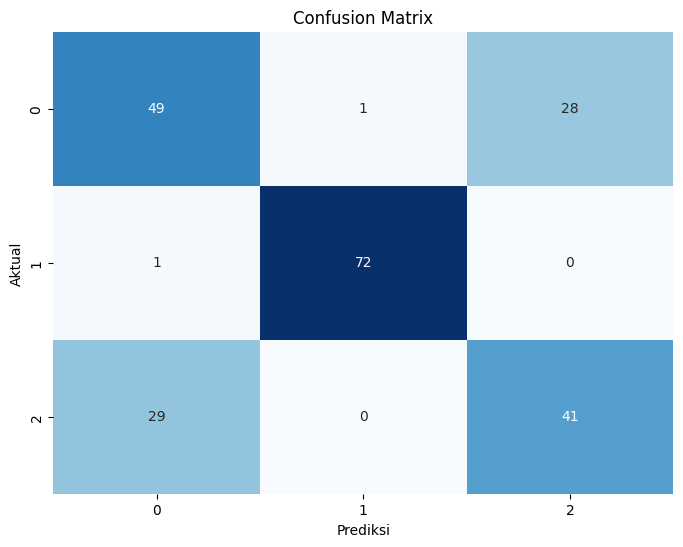

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi confusion matrix menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

### **Precision, Recall, F1-Score**

melihat report dari model terbaik yang sudah disimpan|

In [ ]:
# Membuat dan menampilkan classification report
print(class_report)

              precision    recall  f1-score   support

     Edukasi       0.62      0.63      0.62        78
    Olahraga       0.99      0.99      0.99        73
   Teknologi       0.59      0.59      0.59        70

    accuracy                           0.73       221
   macro avg       0.73      0.73      0.73       221
weighted avg       0.73      0.73      0.73       221



## **Implementasi**

proses implementasi memprediksi kategori berita yang dimasukkan dengan model terbaik yang sudah ditemukan

In [ ]:
data = [data_berita['Berita'][0]]
data

['Mason Greenwood mencatat namanya dalam sejarah Getafe sebagai pahlawan saat timnya berhasil mengatasi Almeria.Laga Getafe vs Almeria merupakan pertandingan pekan ke-26 La Liga, yang berlangsung di Stadion Coliseum pada Minggu, 26 November 2023.Dalam pertarungan sengit tersebut, Getafe berhasil mengamankan kemenangan dengan skor akhir 2-1.Awalnya, tim tuan rumah menghadapi kendala setelah gol Largie Ramazani pada menit ke-7 membuat mereka tertinggal.Namun, kehadiran Mason Greenwood membawa angin segar bagi Getafe, karena pada menit ke-33, dia berhasil menyamakan skor menjadi 1-1.Borja Mayoral kemudian melanjutkan momentum positif dengan mencetak gol pada menit ke-45.Membawa Getafe meraih comeback gemilang dan mengakhiri pertandingan dengan kemenangan 2-1.Hasil ini membawa Getafe naik ke posisi ke-8 dalam klasemen La Liga.Performa gemilang Mason Greenwood tak hanya mencuri perhatian para penonton di Stadion Coliseum, tetapi juga menciptakan sensasi di media sosial.Dia bahkan menjadi tr

In [ ]:
# data = ['Ini momentum emas yang harus diambil, ketika ada calon wakil presiden anak muda kemudian mungkin dianggap representasi ide dan gagasan baru jadi harusnya dia hadir di semua debat, karena akan mengasah dia pelan tapi pasti, katanya.Meski ternyata dia ingin lebih berkonsentrasi ke pemilih kalangan menengah ke bawah, sebagai seorang calon wakil presiden ia diminta oleh publik untuk memiliki kemampuan mengartikulasikan ide dan gagasannya.']
a = tfidf_vectorizer.transform(data).toarray()
b = lda_model.transform(a)
best_model.predict(b)

array(['Edukasi'], dtype=object)